# Applied object-oriented programming

Teacher: [Carlos Natalino](https://www.chalmers.se/en/persons/carda/) / Examiner: [Paolo Monti](https://www.chalmers.se/en/persons/mpaolo/)

[Course channel on Chalmers Play](https://play.chalmers.se/channel/EEN060_EEN065_Applied_object-oriented_programming/300149)

Before you turn this assignment list in, make sure everything runs as expected.
First, **restart the kernel** and then **run all cells**.
Then, check if all the tests run correctly.
Note that if one of the problems present an error, the following ones **will not** be tested.

In case of discrepancies between the problem command and the tests, you should solve it having in mind the tests.

There are two types of cell:
1. *solution cells:* These are the cells where you write your answer, or modify the existing code to solve the problem.
2. *test cells:* These cells are used to test whether your solution is correct or not. If the tests run correctly, you should see a message `tests passed`. Otherwise, you should see an error message.

**Delete** the line `raise NotImplementedError()` from the problems that you solve.

**Do not delete or add any cell in this file.** All cells that you need are already in place.

If you want to execute a cell, select the cell and press **CTRL+Enter** (in Windows) or **CMD+Enter** (in macOS) or click on the **Run cell** button.

**If you want, you can solve this programming assignment using Google Colab**

Link: https://colab.research.google.com/

Just uncomment the following installation line to do so.

**Preparation:** Run the cell below every time you start working on this file, and every time you restart the kernel.

In [ ]:
# the line below installs all packages in Google Colab.
# !pip install redis types-redis python-dotenv matplotlib flask flask-testing toml pytest coverage flake8 requests mypy pylint blinker types-requests isort black lorem-text bs4 pep8-naming

In [2]:
%load_ext autoreload
try:
    from utils import validate_python_code
except:
    import sys
    print("It seems this file is in the wrong folder. "
          "Make sure to place it in the `programming-assignments` folder/project.",
          file=sys.stderr)

---

# Validation of your installation

In this notebook, students check if their installation is working correctly.

Note that there are some errors that are purposefully placed here to test your setup.
Run all cells in this notebook, and send the result screenshots in canvas.
There is an appropriate *computer installation* assignment.

In [13]:
%%writefile initial_file.py
import datetime
import getpass
import os
import random
from typing import Sequence

from matplotlib.figure import Figure


def validating_sum_of_squares(seq: Sequence[str | float | int]) -> Sequence[bool]:
    return_seq = []
    for element in seq:
        try:
            temp = False
            num = int(element)
            if num < 0:
                return_seq.append(False)
                continue
            for i in range(int(num ** 0.5) + 1):
                remainder = (num - i ** 2) ** 0.5
                if remainder.is_integer():
                    return_seq.append(True)
                    temp = True
                    break
            if temp is False:
                return_seq.append(False)
        except (ValueError, TypeError):
            return_seq.append(False)
    return return_seq

def generate_plot(single_line_fig: Figure):
    Numbers = []
    for i in range(100):
        if i < 50: 
            Numbers.append(random.randint(0, 10))
        else:
            Numbers.append(random.randint(10, 20))

    axes: Axes = single_line_fig.gca()
    axes.set_title(
        f"""If you see this, your installation was successful!
        Date: {datetime.datetime.now()}
        Folder: {os.getcwd()}
        User: {getpass.getuser()}"""
    )
    axes.plot(Numbers)
    single_line_fig.tight_layout()
    return single_line_fig

Overwriting initial_file.py


In [ ]:
%%writefile tests_validating_sum_of_squares_solution.py
# make sure to run this cell before running the next one
from unittest.mock import patch

from initial_file import validating_sum_of_squares

def tests_validating_sum_of_squares():

    test_cases = [(['2', 'x', -10, 3.3, 'asd', None, 'b', 4.0], \
        [True, False, False, False, False, False, False, True]), \
        ([9, 'x', -9, None], [True, False, False, False])]

    for _in, _out in test_cases:
        _res = validating_sum_of_squares(_in)
        assert _res == _out, f"The function with input `{_in}` should return the value \
    `{_out}` of type `{type(_out)}`\n but returned the value `{_res}` of type `{type(_res)}`."

In [ ]:
# test cell
try:
    import initial_file
except:
    raise ValueError("You did not execute your solution cell!")
try:
    from initial_file import validating_sum_of_squares
except:
    raise ValueError("Your solution does not contain the right function!")

output=!coverage run -m pytest -q tests_validating_sum_of_squares_solution.py

from coverage import Coverage
cov = Coverage()
# cov.exclude("tests_validating_sum_of_squares_solution.py")
cov.load()
print("#" * 10, "Code quality report", "#" * 10)
value = cov.report()
if value < 100:
    print("The code coverage found some issues in your code. Some lines might not be \
needed. Check the test and validation messages.")
cov.erase()
print("#" * 10, "End code quality report", "#" * 10)

validate_python_code("test_plot.py")
print('tests passed', u'\u2713')

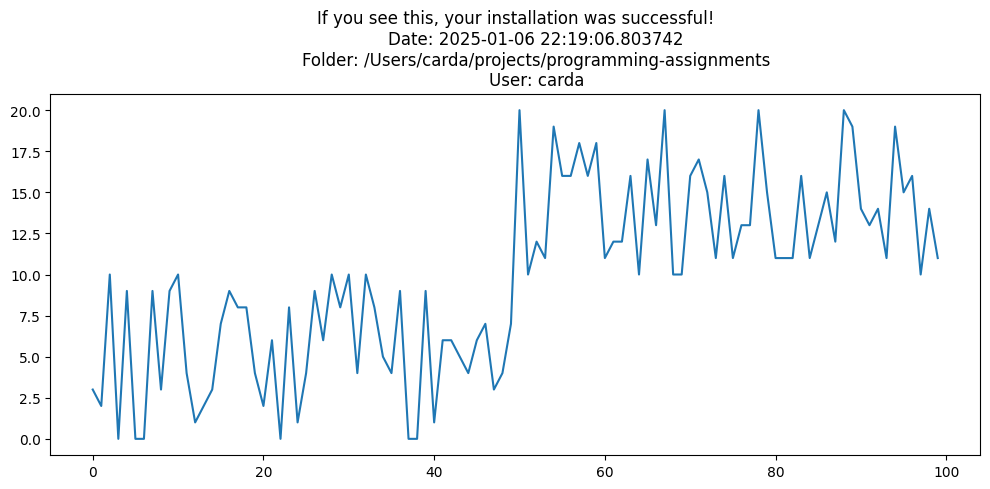

In [15]:
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as plt

from initial_file import generate_plot

fig = plt.figure(figsize=(10, 5))
fig = generate_plot(fig)
plt.show()

In [ ]:
# test cell
validate_python_code("initial_file.py")
print('tests passed', u'\u2713')